In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

vcr_bloom_data = pd.read_csv("/content/drive/MyDrive/data/peak-bloom-prediction/data/liestal.csv")

In [3]:
vcr_bloom_data.head()

,location,lat,long,alt,year,bloom_date,bloom_doy
0,liestal,47.4814,7.730519,350,1894,1894-04-16,106
1,liestal,47.4814,7.730519,350,1895,1895-04-17,107
2,liestal,47.4814,7.730519,350,1896,1896-04-16,107
3,liestal,47.4814,7.730519,350,1897,1897-03-27,86
4,liestal,47.4814,7.730519,350,1898,1898-04-16,106


In [4]:
vcr_weather_data = pd.read_csv("/content/drive/MyDrive/data/peak-bloom-prediction/vancouver_harbour_cs.csv")

In [5]:
vcr_weather_data.head()

,,,,,,"VANCOUVER HARBOUR CS, BC CA (CA001108446)"
Date,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),SNWD (Inches)
1925-11-01,NaN,NaN,NaN,0.00,0.0,NaN
1925-11-02,NaN,NaN,NaN,0.00,0.0,NaN
1925-11-03,NaN,NaN,NaN,0.00,0.0,NaN
1925-11-04,NaN,NaN,NaN,0.00,0.0,NaN


In [6]:
vcr_weather_df = vcr_weather_data.drop(vcr_weather_data.columns[0], axis=1).reset_index()
header = vcr_weather_df.iloc[0]
vcr_weather_df = vcr_weather_df[1:]
vcr_weather_df.columns = header
vcr_weather_df = vcr_weather_df.reset_index(drop=True)

In [7]:
vcr_weather_df.head()

,Date,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches)
0,1925-11-01,NaN,NaN,NaN,0.00,0.0
1,1925-11-02,NaN,NaN,NaN,0.00,0.0
2,1925-11-03,NaN,NaN,NaN,0.00,0.0
3,1925-11-04,NaN,NaN,NaN,0.00,0.0
4,1925-11-05,NaN,NaN,NaN,0.00,0.0


In [8]:
# vcr
# Winter: Dec 1 - Feb 28
# Spring: March 1 - May 31
# Summer: June 1 - August 31
# Autumn: September 1 - November 30

# function to find season from month
def find_season(date):
  season_month = {
      '12':'Winter-EOY', '01':'Winter-BOY', '02':'Winter-BOY',  # end-of-year winter and beginning-of-year winter
      '03':'Spring', '04':'Spring', '05':'Spring',
      '06':'Summer', '07':'Summer', '08':'Summer',
      '09':'Autumn', '10':'Autumn', '11':'Autumn'}
  return season_month.get(date[5:-3])

# applys season function
vcr_weather_df["season"] = vcr_weather_df["Date"].astype(str).apply(find_season)

# extracts year from date
vcr_weather_df["year"] = vcr_weather_df["Date"].astype(str).apply(lambda date: date[:4])

# drops date column
vcr_weather_df = vcr_weather_df.drop(["Date"], axis=1)

In [9]:
# formates to better datatypes
vcr_weather_df["TAVG (Degrees Fahrenheit)"] = vcr_weather_df["TAVG (Degrees Fahrenheit)"].astype(float)
vcr_weather_df["TMAX (Degrees Fahrenheit)"] = vcr_weather_df["TMAX (Degrees Fahrenheit)"].astype(float)
vcr_weather_df["TMIN (Degrees Fahrenheit)"] = vcr_weather_df["TMIN (Degrees Fahrenheit)"].astype(float)
vcr_weather_df["PRCP (Inches)"] = vcr_weather_df["PRCP (Inches)"].astype(float)
vcr_weather_df["SNOW (Inches)"] = vcr_weather_df["SNOW (Inches)"].astype(float)
vcr_weather_df["year"] = vcr_weather_df["year"].astype(int)

In [10]:
vcr_weather_df

,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),season,year
0,NaN,NaN,NaN,0.00,0.0,Autumn,1925
1,NaN,NaN,NaN,0.00,0.0,Autumn,1925
2,NaN,NaN,NaN,0.00,0.0,Autumn,1925
3,NaN,NaN,NaN,0.00,0.0,Autumn,1925
4,NaN,NaN,NaN,0.00,0.0,Autumn,1925
...,...,...,...,...,...,...,...
24771,NaN,56.0,39.0,0.09,0.0,Autumn,1999
24772,NaN,56.0,50.0,0.37,0.0,Autumn,1999
24773,NaN,51.0,45.0,1.13,0.0,Autumn,1999
24774,NaN,49.0,46.0,1.69,0.0,Autumn,1999


In [11]:
# adds data of previous december to current year's winter
vcr_weather_df["year"] = vcr_weather_df[["season","year"]].apply(lambda x: x["year"] + 1 if x["season"] == "Winter-EOY" else x["year"], axis=1)

# standardizes all winters
vcr_weather_df["season"] = vcr_weather_df["season"].replace(to_replace=["Winter-EOY", "Winter-BOY"], value="Winter")

vcr_weather_df.head(200)

,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),season,year
0,NaN,NaN,NaN,0.00,0.0,Autumn,1925
1,NaN,NaN,NaN,0.00,0.0,Autumn,1925
2,NaN,NaN,NaN,0.00,0.0,Autumn,1925
3,NaN,NaN,NaN,0.00,0.0,Autumn,1925
4,NaN,NaN,NaN,0.00,0.0,Autumn,1925
...,...,...,...,...,...,...,...
195,NaN,NaN,NaN,0.01,0.0,Spring,1926
196,NaN,NaN,NaN,0.22,0.0,Spring,1926
197,NaN,NaN,NaN,0.07,0.0,Spring,1926
198,NaN,NaN,NaN,0.12,0.0,Spring,1926


In [12]:
vcr_weather_df.tail(200)

,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches),SNOW (Inches),season,year
24576,NaN,63.0,40.0,0.00,NaN,Spring,1999
24577,NaN,67.0,45.0,0.00,NaN,Spring,1999
24578,NaN,71.0,48.0,0.00,NaN,Spring,1999
24579,NaN,62.0,49.0,0.00,NaN,Spring,1999
24580,NaN,50.0,44.0,0.76,NaN,Spring,1999
...,...,...,...,...,...,...,...
24771,NaN,56.0,39.0,0.09,0.0,Autumn,1999
24772,NaN,56.0,50.0,0.37,0.0,Autumn,1999
24773,NaN,51.0,45.0,1.13,0.0,Autumn,1999
24774,NaN,49.0,46.0,1.69,0.0,Autumn,1999


In [13]:
# groups based on year and season
vcr_weather_df_grouped = vcr_weather_df.groupby(["year", "season"]).agg({'TAVG (Degrees Fahrenheit)':'mean',
                                                                 'TMAX (Degrees Fahrenheit)':'max',
                                                                 'TMIN (Degrees Fahrenheit)':'min',
                                                                 'PRCP (Inches)':['sum','mean','median'],
                                                                 'SNOW (Inches)':['sum','mean','median']}).reset_index()

vcr_weather_df_grouped.head()

0  year  season TAVG (Degrees Fahrenheit)  ... SNOW (Inches)            
                                     mean  ...           sum mean median
0  1925  Autumn                       NaN  ...           0.0  0.0    0.0
1  1926  Autumn                       NaN  ...           0.0  0.0    0.0
2  1926  Spring                       NaN  ...           0.0  0.0    0.0
3  1926  Summer                       NaN  ...           0.0  0.0    0.0
4  1926  Winter                       NaN  ...           0.0  0.0    0.0

[5 rows x 11 columns]

In [14]:
# applys season function
vcr_bloom_df = vcr_bloom_data.copy()
vcr_bloom_df["season"] = vcr_bloom_df["bloom_date"].astype(str).apply(find_season)

# drops bloom_date column and constant data
vcr_bloom_df = vcr_bloom_df.drop(["bloom_date","location", "lat", "long", "alt","season"], axis=1)

In [15]:
vcr_bloom_df.tail(15)

,year,bloom_doy
113,2007,94
114,2008,89
115,2009,100
116,2010,98
117,2011,90
118,2012,93
119,2013,107
120,2014,84
121,2015,101
122,2016,97


In [16]:
# adds climate data to bloom date
vcr_merged_df = pd.merge(vcr_bloom_df, vcr_weather_df_grouped, on="year", how="outer")

# sets year as index
vcr_merged_df = vcr_merged_df.set_index(vcr_merged_df.columns[0])

# fixes column names
vcr_merged_df.columns = ['bloom_day', 'season', 'TAVG_mean', 'TMAX_max', 'TMIN_min', 'PRCP_sum', 'PRCP_mean', 'PRCP_median', 'SNOW_sum', 'SNOW_mean', 'SNOW_median']

# removes rows that lack seasonal data
vcr_merged_df = vcr_merged_df[vcr_merged_df['season'].notna()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [17]:
vcr_merged_df

,bloom_day,season,TAVG_mean,TMAX_max,TMIN_min,PRCP_sum,PRCP_mean,PRCP_median,SNOW_sum,SNOW_mean,SNOW_median
year,,,,,,,,,,,
1925,104,Autumn,NaN,NaN,NaN,1.48,0.049333,0.000,0.0,0.0,0.0
1926,99,Autumn,NaN,NaN,NaN,19.25,0.211538,0.010,0.0,0.0,0.0
1926,99,Spring,NaN,NaN,NaN,10.08,0.109565,0.005,0.0,0.0,0.0
1926,99,Summer,NaN,NaN,NaN,3.62,0.039348,0.000,0.0,0.0,0.0
1926,99,Winter,NaN,NaN,NaN,27.97,0.310778,0.105,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1998,90,Winter,NaN,59.0,23.0,14.60,0.173810,0.085,0.0,NaN,NaN
1999,94,Autumn,NaN,77.0,39.0,5.72,0.093770,0.000,0.0,0.0,0.0
1999,94,Spring,NaN,80.0,31.0,10.15,0.110326,0.010,0.0,NaN,NaN


In [18]:
import numpy as np

# creates dataframe with seasonal variables as columns
seasons = ("Summer", "Winter", "Autumn", "Spring")

new_columns = []
for season in seasons:
  for column in vcr_merged_df.columns[2:]:
    new_columns.append(f"{season}_{column}")

vcr_processed_df = pd.DataFrame(columns=new_columns)

for year, row in vcr_merged_df.iterrows():
  included_cols = []
  new_row = []

  for season in seasons:
    if row["season"] == season:
      for column in vcr_merged_df.columns[2:]:
        included_cols.append(f"{season}_{column}")
        new_row.append(row[column])
  
  row_df = pd.DataFrame([pd.Series(new_row)], index = [year])
  row_df = row_df.set_axis(included_cols, axis=1, inplace=False)
  
  vcr_processed_df = pd.concat([row_df, vcr_processed_df])[vcr_processed_df.columns]  # preserves column name order

# combines rows
vcr_processed_df = vcr_processed_df.groupby(vcr_processed_df.index)[vcr_processed_df.columns].first()

# adds bloom doys
vcr_processed_df.insert(0, "bloom_doy", np.NaN)

for year, row in vcr_processed_df.iterrows():
  try:
    vcr_processed_df.loc[year, "bloom_doy"] = int(vcr_bloom_df.query(f"year=={str(year)}")["bloom_doy"])
  except:
    vcr_processed_df.loc[year, "bloom_doy"] = np.NaN

vcr_processed_df = vcr_processed_df[:-1]

In [19]:
vcr_processed_df.tail()

,bloom_doy,Summer_TAVG_mean,Summer_TMAX_max,Summer_TMIN_min,Summer_PRCP_sum,Summer_PRCP_mean,Summer_PRCP_median,Summer_SNOW_sum,Summer_SNOW_mean,Summer_SNOW_median,Winter_TAVG_mean,Winter_TMAX_max,Winter_TMIN_min,Winter_PRCP_sum,Winter_PRCP_mean,Winter_PRCP_median,Winter_SNOW_sum,Winter_SNOW_mean,Winter_SNOW_median,Autumn_TAVG_mean,Autumn_TMAX_max,Autumn_TMIN_min,Autumn_PRCP_sum,Autumn_PRCP_mean,Autumn_PRCP_median,Autumn_SNOW_sum,Autumn_SNOW_mean,Autumn_SNOW_median,Spring_TAVG_mean,Spring_TMAX_max,Spring_TMIN_min,Spring_PRCP_sum,Spring_PRCP_mean,Spring_PRCP_median,Spring_SNOW_sum,Spring_SNOW_mean,Spring_SNOW_median
1994,82.0,NaN,88.0,48.0,5.71,0.062065,0.0,0.0,NaN,NaN,NaN,56.0,28.0,20.38,0.236977,0.010,0.0,NaN,NaN,NaN,75.0,32.0,16.74,0.183956,0.020,0.0,NaN,NaN,NaN,75.0,32.0,9.34,0.101522,0.00,0.0,NaN,NaN
1995,93.0,NaN,85.0,52.0,6.35,0.069022,0.0,0.0,NaN,NaN,NaN,58.0,25.0,23.35,0.259444,0.030,0.0,NaN,NaN,NaN,77.0,34.0,20.70,0.227473,0.010,0.0,NaN,NaN,NaN,76.0,32.0,8.67,0.094239,0.00,0.0,NaN,NaN
1996,109.0,NaN,85.0,51.0,3.38,0.036739,0.0,0.0,NaN,NaN,NaN,58.0,17.0,19.52,0.238049,0.005,0.0,NaN,NaN,NaN,72.0,27.0,24.22,0.269111,0.035,0.0,NaN,NaN,NaN,68.0,31.0,15.95,0.175275,0.02,0.0,NaN,NaN
1997,81.0,NaN,85.0,50.0,8.40,0.091304,0.0,0.0,0.0,0.0,NaN,55.0,19.0,25.98,0.288667,0.060,0.0,NaN,NaN,NaN,77.0,35.0,13.99,0.177089,0.010,0.0,NaN,NaN,NaN,78.0,31.0,20.42,0.221957,0.04,0.0,NaN,NaN
1998,90.0,NaN,89.0,51.0,3.55,0.038587,0.0,0.0,NaN,NaN,NaN,59.0,23.0,14.60,0.173810,0.085,0.0,NaN,NaN,NaN,83.0,39.0,18.30,0.201099,0.020,0.0,NaN,NaN,NaN,78.0,32.0,3.49,0.112581,0.00,0.0,NaN,NaN


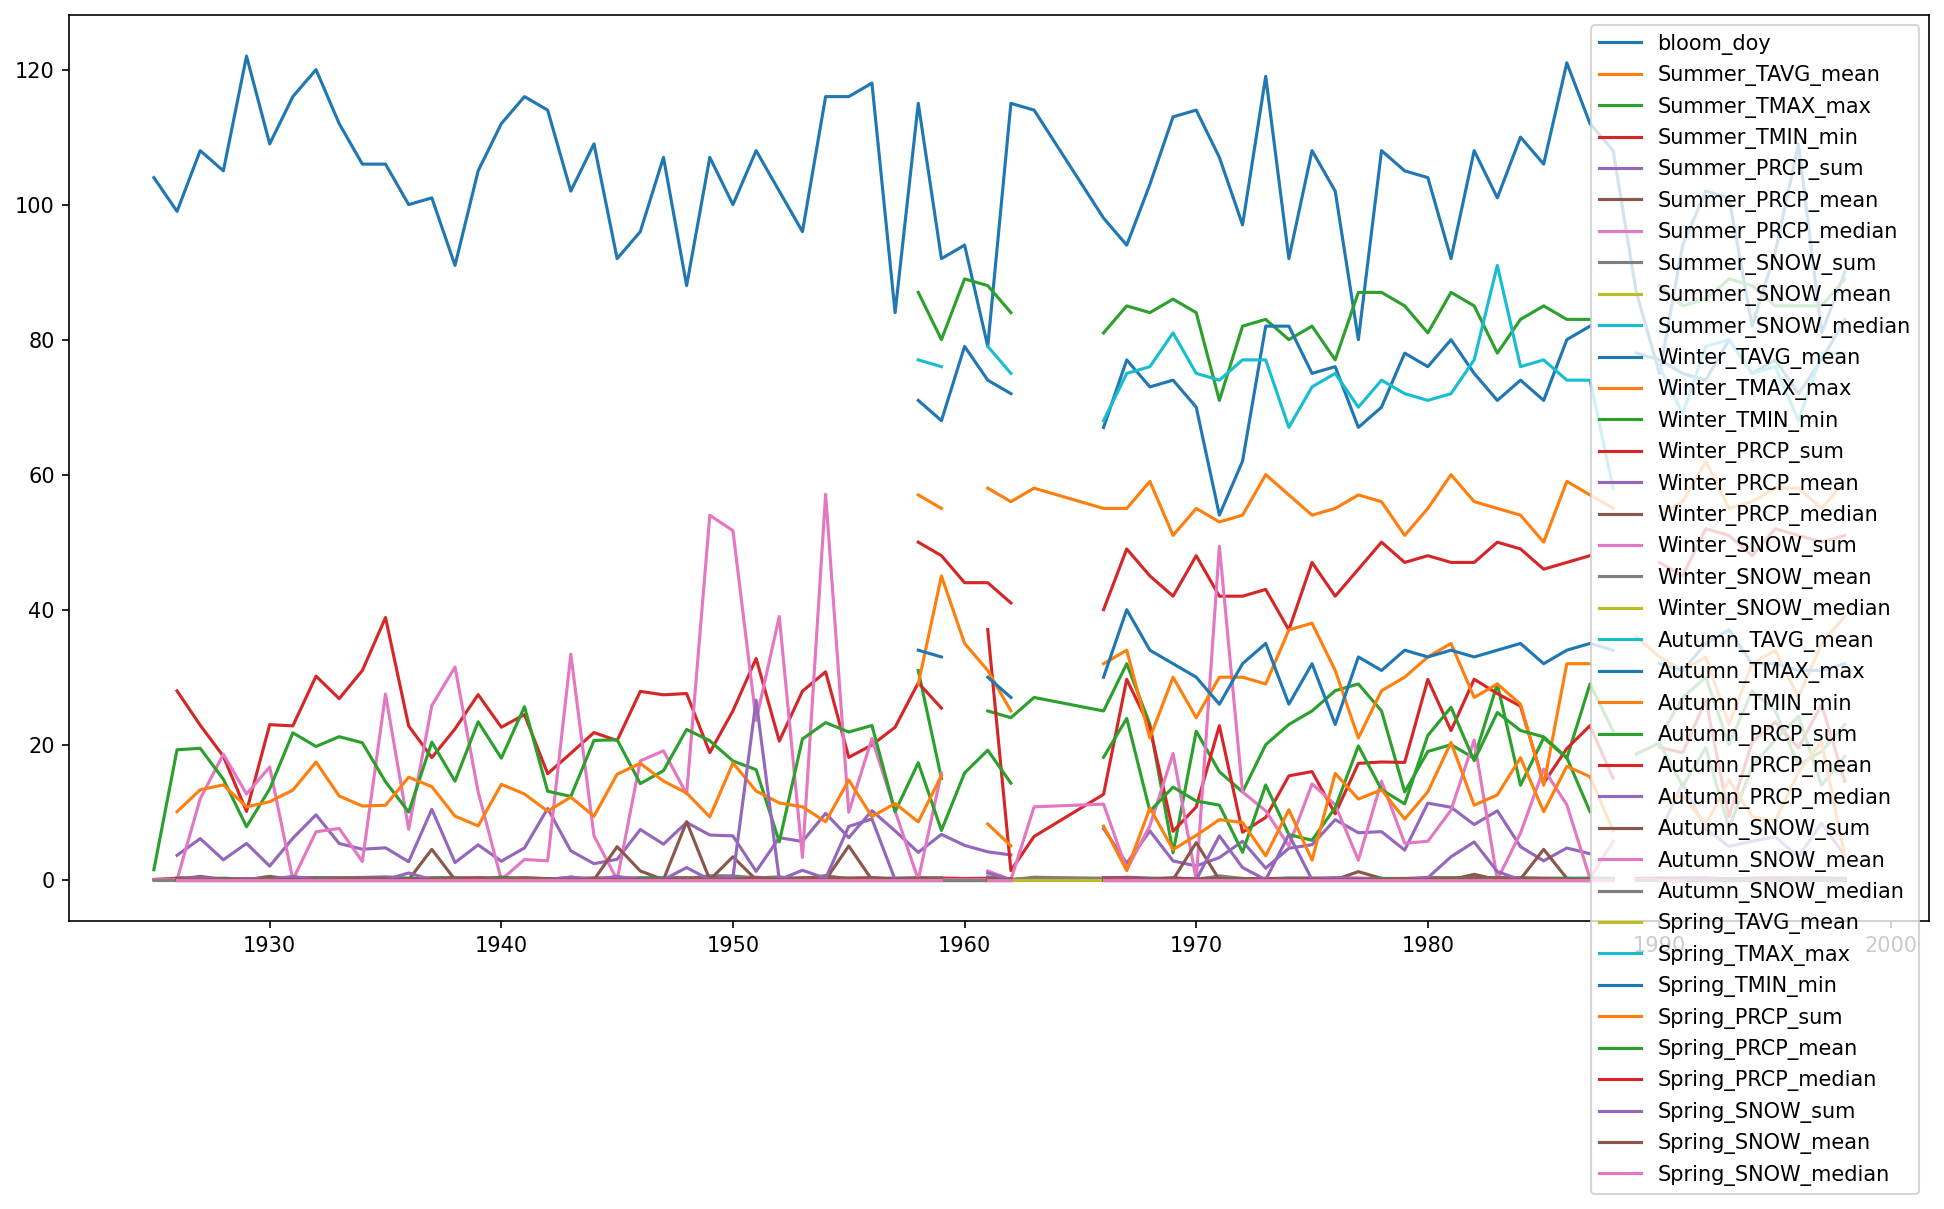

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8), dpi=150)
plt.plot(vcr_processed_df)
plt.gca().legend(tuple(vcr_processed_df.columns), loc='upper right')
plt.show()

In [21]:
# removes low variance columns
from sklearn.feature_selection import VarianceThreshold

vcr_imputed_df = vcr_processed_df.copy()

var_thr = VarianceThreshold(threshold = 0.25)
var_thr.fit(vcr_imputed_df)

concol = [column for column in vcr_imputed_df.columns 
          if column not in vcr_imputed_df.columns[var_thr.get_support()]]

vcr_imputed_df = vcr_imputed_df.drop(concol, axis=1)

print(concol)

['Summer_TAVG_mean', 'Summer_PRCP_mean', 'Summer_PRCP_median', 'Summer_SNOW_sum', 'Summer_SNOW_mean', 'Summer_SNOW_median', 'Winter_TAVG_mean', 'Winter_PRCP_mean', 'Winter_PRCP_median', 'Winter_SNOW_mean', 'Winter_SNOW_median', 'Autumn_TAVG_mean', 'Autumn_PRCP_mean', 'Autumn_PRCP_median', 'Autumn_SNOW_mean', 'Autumn_SNOW_median', 'Spring_TAVG_mean', 'Spring_PRCP_mean', 'Spring_PRCP_median', 'Spring_SNOW_mean', 'Spring_SNOW_median']


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_variance_threshold.py:104: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


In [22]:
from sklearn.impute import KNNImputer

# knn imputation
knn_imputer = KNNImputer(n_neighbors=3, weights="uniform")
vcr_imputed_df = pd.DataFrame(knn_imputer.fit_transform(vcr_imputed_df), columns = vcr_imputed_df.columns)

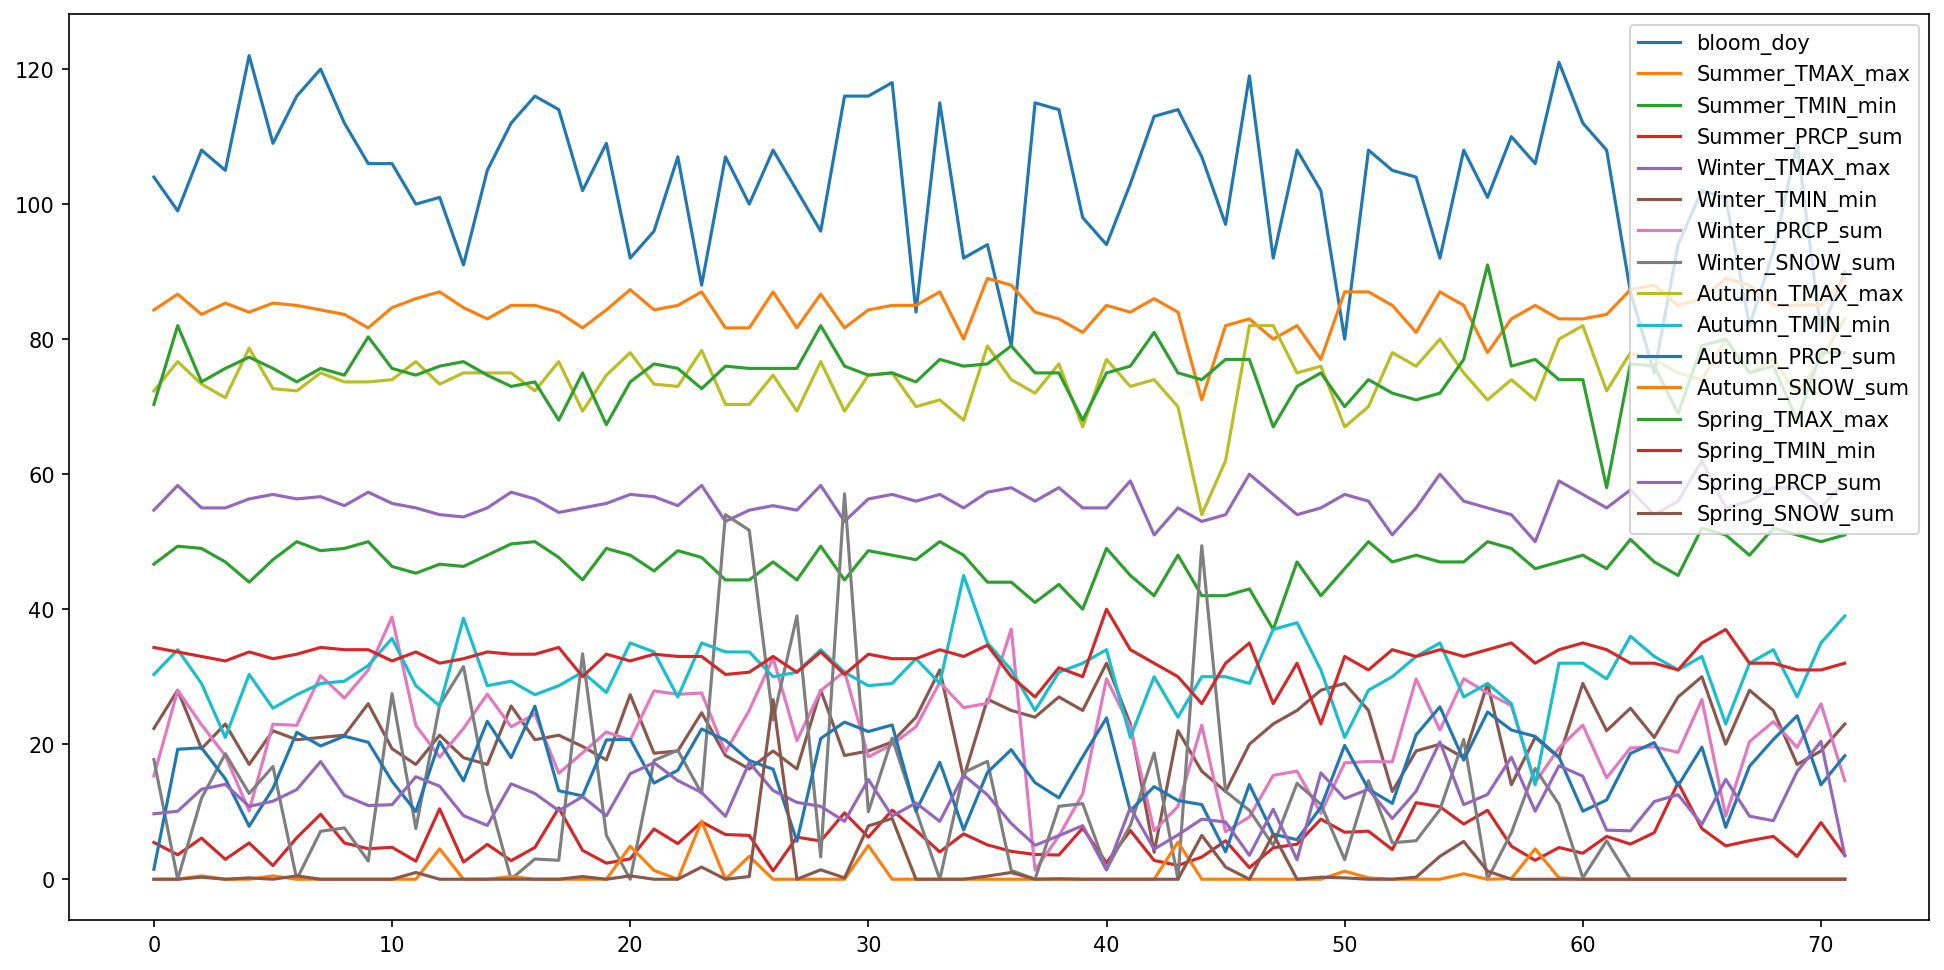

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8), dpi=150)
plt.plot(vcr_imputed_df)
plt.gca().legend(tuple(vcr_imputed_df.columns), loc='upper right')
plt.show()

In [24]:
vcr_imputed_df.head()

,bloom_doy,Summer_TMAX_max,Summer_TMIN_min,Summer_PRCP_sum,Winter_TMAX_max,Winter_TMIN_min,Winter_PRCP_sum,Winter_SNOW_sum,Autumn_TMAX_max,Autumn_TMIN_min,Autumn_PRCP_sum,Autumn_SNOW_sum,Spring_TMAX_max,Spring_TMIN_min,Spring_PRCP_sum,Spring_SNOW_sum
0,104.0,84.333333,46.666667,5.453333,54.666667,22.333333,15.30,17.733333,72.333333,30.333333,1.48,0.0,70.333333,34.333333,9.69,0.0
1,99.0,86.666667,49.333333,3.620000,58.333333,28.000000,27.97,0.000000,76.666667,34.000000,19.25,0.0,82.000000,33.666667,10.08,0.0
2,108.0,83.666667,49.000000,6.090000,55.000000,19.333333,22.89,12.000000,73.333333,29.000000,19.47,0.5,73.666667,33.000000,13.33,0.3
3,105.0,85.333333,47.000000,2.950000,55.000000,23.000000,18.29,18.600000,71.333333,21.000000,14.88,0.0,75.666667,32.333333,14.05,0.0
4,122.0,84.000000,44.000000,5.380000,56.333333,17.000000,10.12,12.700000,78.666667,30.333333,7.85,0.0,77.333333,33.666667,10.79,0.2


In [25]:
train = vcr_imputed_df[:int(0.8*(len(vcr_imputed_df)))]
valid = vcr_imputed_df[int(0.8*(len(vcr_imputed_df))):]

In [26]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [27]:
from sklearn.metrics import mean_absolute_error
from math import sqrt

pred = pd.DataFrame(index=range(0,len(prediction)),columns=[vcr_imputed_df.columns])

for j in range(0,len(vcr_imputed_df.columns)):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in vcr_imputed_df.columns:
    print('MAE value for', i, 'is : ', sqrt(mean_absolute_error(pred[i], valid[i])))

MAE value for bloom_doy is :  3.375185365829363
MAE value for Summer_TMAX_max is :  1.5333964828853959
MAE value for Summer_TMIN_min is :  1.809684362339245
MAE value for Summer_PRCP_sum is :  1.3911882709792702
MAE value for Winter_TMAX_max is :  1.5242610059168349
MAE value for Winter_TMIN_min is :  1.926516096917651
MAE value for Winter_PRCP_sum is :  1.8754948079283131
MAE value for Winter_SNOW_sum is :  3.821941448850021
MAE value for Autumn_TMAX_max is :  2.1646330109549003
MAE value for Autumn_TMIN_min is :  2.102294719763384
MAE value for Autumn_PRCP_sum is :  1.9889163700319488
MAE value for Autumn_SNOW_sum is :  0.9247115176061828
MAE value for Spring_TMAX_max is :  1.8895417034911723
MAE value for Spring_TMIN_min is :  1.2723514377702605
MAE value for Spring_PRCP_sum is :  2.0301225973860086
MAE value for Spring_SNOW_sum is :  1.2169409764417398


In [28]:
# make final predictions
model = VAR(endog=vcr_imputed_df)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=10)
print(yhat)

[[ 8.63634630e+01  8.36328852e+01  4.64375206e+01  7.51729519e+00
   5.56621379e+01  2.35975377e+01  1.63134574e+01  5.33237949e+00
   7.55393631e+01  3.25182676e+01  1.61575067e+01  2.31566309e-01
   7.18820079e+01  2.72546270e+01  1.30065464e+01  1.70811307e-02]
 [ 9.12864054e+01  8.59598436e+01  4.88748263e+01  7.27664885e+00
   5.64553232e+01  2.48995041e+01  1.76637128e+01  3.44518152e+00
   7.41856778e+01  3.21828960e+01  1.91707220e+01  3.91295583e-01
   7.26734612e+01  3.14372202e+01  1.10300484e+01 -6.35724260e-02]
 [ 9.42478404e+01  8.58113189e+01  4.89103413e+01  7.13359290e+00
   5.65130444e+01  2.36898195e+01  2.13100298e+01  6.90682199e+00
   7.49617292e+01  3.18674288e+01  1.83258406e+01  8.76351571e-02
   7.43321764e+01  3.23218247e+01  1.18236814e+01 -9.10694801e-02]
 [ 9.66409484e+01  8.59250133e+01  4.86655470e+01  6.72783650e+00
   5.62759011e+01  2.27673200e+01  2.19612942e+01  6.93122357e+00
   7.53464645e+01  3.11068554e+01  1.84143686e+01  3.73353620e-01
   7.49

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
